In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import torch

In [9]:
x = np.linspace(0, 5, 1000)
y = 3 + 1*x + 0.0 * x**2 + -0.0 * x**3 + np.random.randn(len(x))*1

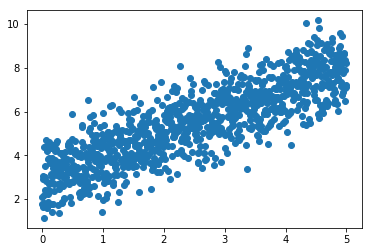

In [262]:
plt.figure()
plt.plot(x, y, 'o')

In [280]:
coeff = torch.randn(4, requires_grad=True).float()

torch_x = torch.from_numpy(np.array(x)).float()
torch_y = torch.from_numpy(np.array(y)).float()

optimizer = torch.optim.Adam([coeff], lr=0.01)

lr = 0.00001
ll = None
for epoch in range(1000):
    
    y_pred = coeff[0] + coeff[1]*torch_x + coeff[2]*torch_x.pow(2) + coeff[3]*torch_x.pow(3)
    loss = (torch_y - y_pred).pow(2).sum().div_(len(x))
    loss.backward()
    
    print(loss.item())
    if ll is not None and loss.item() > ll:
        break
    ll = loss.item()
    
    optimizer.step()
    
#     with torch.no_grad():
#         coeff.grad.div_(len(x))
#         coeff -= lr * coeff.grad
#         coeff.grad.zero_()

247.40975952148438
229.29171752929688
212.49032592773438
196.49717712402344
181.15615844726562
166.41334533691406
152.25550842285156
138.68911743164062
125.73115539550781
113.40457153320312
101.7360610961914
90.75434875488281
80.48943328857422
70.97161102294922
62.231258392333984
54.29813766479492
47.201133728027344
40.967960357666016
35.624698638916016
31.19561767578125
27.70279312133789
25.16582679748535
23.601518630981445
23.023508071899414
23.441967010498047


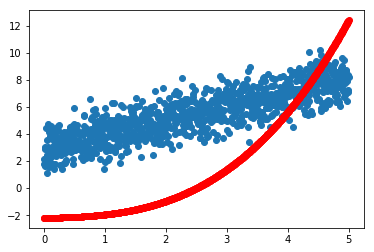

In [281]:
coeffs = coeff.data.numpy()
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, [coeff[0] + coeff[1]*x + coeff[2]*(x**2) + coeff[3]*(x**3) for x in x], 'o', color='red')

In [180]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=3000, n_features=10, n_informative=10, n_redundant=0,)

In [220]:
%%time

# torch_x = [torch.from_numpy(x).float() for x in x]
# torch_y = [torch.from_numpy(np.array([y])).float() for y in y]

torch.manual_seed(0)

w1 = torch.randn(10, 20, requires_grad=True).float()
bias1 = torch.zeros(20, requires_grad=True).float()

w2 = torch.randn(20, 2, requires_grad=True).float()
bias2 = torch.zeros(2, requires_grad=True).float()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([w1, bias1, w2, bias2], lr=0.01)
# optimizer = torch.optim.SGD([w1, bias1, w2, bias2], lr=0.01)

for epoch in range(1000):
    losses = []
#     for i in range(len(x)):

    pred = torch.matmul(torch.from_numpy(x).float(), w1) + bias1
    pred = torch.relu(pred)
    pred = torch.matmul(pred, w2) + bias2
#     pred = torch.sigmoid(pred)
    pred = torch.softmax(pred, 1)

#         pred = torch.unsqueeze(pred, dim=0)
#     loss = torch.nn.functional.nll_loss(pred, torch.tensor(y).long())
    loss = criterion(pred, torch.tensor(y).long())
    loss.backward()

    losses.append(loss.item())

    optimizer.step()

    bias.grad.zero_()
    w.grad.zero_()
    if epoch % 100 == 0:
        print(epoch, np.mean(losses))
        

0 0.7335392832756042
100 0.4894978702068329
200 0.4344920217990875
300 0.4113495945930481
400 0.4039731025695801
500 0.3918175995349884
600 0.39403268694877625
700 0.38970592617988586
800 0.3931104838848114
900 0.40066468715667725
CPU times: user 8.97 s, sys: 37.5 ms, total: 9.01 s
Wall time: 3.15 s


In [207]:
pred = torch.matmul(torch.from_numpy(x).float(), w1) + bias1
pred = torch.relu(pred)
pred = torch.matmul(pred, w2) + bias2
# pred = torch.sigmoid(pred)
# pred = torch.log_softmax(pred, 1)
#     pred = torch.softmax(pred, 0)
#     pred = torch.relu(pred)
#     pred = torch.nn.functional.leaky_relu(pred)
#     print(pred)
#     assert False
pred = pred.data.numpy().argmax(axis=1)
print(1 - np.abs((pred - y)).mean())

# print(correct / len(y))

0.9276666666666666


In [259]:
%%time

class DCPNet(torch.nn.Module):
    def __init__(self):
        super(DCPNet, self).__init__()
        self.lin1 = torch.nn.Linear(10, 300)
        self.lin2 = torch.nn.Linear(300, 2)
        
        
        
        
    def forward(self, x):
        x = x + torch.randn(*x.shape) * 0.1
        x = self.lin1(x)
#         out1 = torch.relu(x)
#         out2 = torch.sigmoid(x)
#         out3 = torch.tanh(x)
        
#         x = torch.cat((out1, out2, out3), dim=1)
        
        x = torch.relu(x)
        x = self.lin2(x)
        x = torch.sigmoid(x)
        x = torch.softmax(x, 1)
        return x
model = DCPNet()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1000):
    model.zero_grad()
    output = model(torch.from_numpy(x).float())
    loss = criterion(output, torch.from_numpy(y).long())
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, loss.item())

0 0.7032844424247742
100 0.5440184473991394
200 0.5204848647117615
300 0.5122991800308228
400 0.5078908801078796
500 0.5052595734596252
600 0.5030077695846558
700 0.5012244582176208
800 0.5000519752502441
900 0.49886593222618103
CPU times: user 26.7 s, sys: 93.6 ms, total: 26.8 s
Wall time: 9.08 s


In [260]:
pred = model(torch.tensor(x).float()).detach().numpy()
pred = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score

accuracy_score(y, pred)

0.987